In [95]:
from math import pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from neuron.units import ms, mV, um
h.load_file('stdrun.hoc')

1.0

In [96]:
class MyelinatedAxon():
    def __init__(self, gid):
        self._gid = gid
        self.axon = h.Section('axon', self)
        self.axon.L = 20_000 * um
        self.axon.diam = 8 * um
        self.axon.insert(h.pas)
        self.axon.insert(h.hh)
        self.axon.nseg = 50
        self.axon.Ra = 100
        self.axon.cm = 0.01
        for seg in self.axon:
            seg.pas.e = -65 * mV
        
        self.v = h.Vector().record(self.axon(0.9)._ref_v)

    def __repr__(self):
        return f'MyelinatedAxon[{self._gid}]'

In [97]:
class UnmyelinatedAxon():
    def __init__(self, gid):
        self._gid = gid
        self.axon = h.Section('axon', self)
        self.axon.L = 20_000 * um
        self.axon.diam = 3 * um
        self.axon.insert(h.pas)
        self.axon.insert(h.hh)
        self.axon.nseg = 50
        self.axon.Ra = 200
        self.axon.cm = 1.0
        for seg in self.axon:
            seg.pas.e = -65 * mV
        
        self.v = h.Vector().record(self.axon(0.9)._ref_v)

    def __repr__(self):
        return f'UnmyelinatedAxon[{self._gid}]'

In [98]:
myelaxons = [MyelinatedAxon(i) for i in range(5)]
unmyelaxons = [UnmyelinatedAxon(i) for i in range(10)]

In [99]:
h.topology()


|--------------------------------------------------|       MyelinatedAxon[0].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[1].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[2].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[3].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[4].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[0].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[1].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[2].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[3].axon(0-1)
|--------------------------------------------------|       MyelinatedAxon[4].axon(0-1)
|--------------------------------------------------|       UnmyelinatedAxon[0].axon(0-1)
|---------------------------------------

1.0

In [100]:
myelics = [h.IClamp(cell.axon(0.1)) for cell in myelaxons]
for idx, iclamp in enumerate(myelics):
    position = np.array([10*cos(idx/5*2*pi), 10*sin(idx/5*2*pi), 1e4])
    distance = np.linalg.norm(position)
    iclamp.delay = 10 * ms
    iclamp.dur = 1 * ms
    iclamp.amp = 1e6 / distance

unmyelics = [h.IClamp(cell.axon(0.1)) for cell in unmyelaxons]
for idx, iclamp in enumerate(unmyelics):
    position = np.array([20*cos(idx/10*2*pi), 20*sin(idx/10*2*pi), 1e4])
    distance = np.linalg.norm(position)
    iclamp.delay = 10 * ms
    iclamp.dur = 1 * ms
    iclamp.amp = 1e6 / distance

In [101]:
t = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

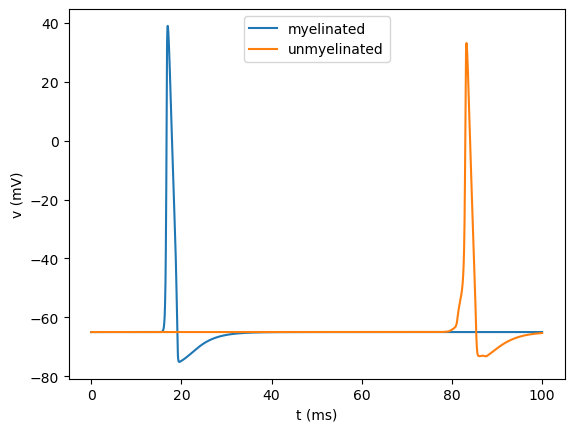

In [102]:
plt.plot(t, myelaxons[0].v, label='myelinated')
plt.plot(t, unmyelaxons[0].v, label='unmyelinated')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.legend()
plt.show()

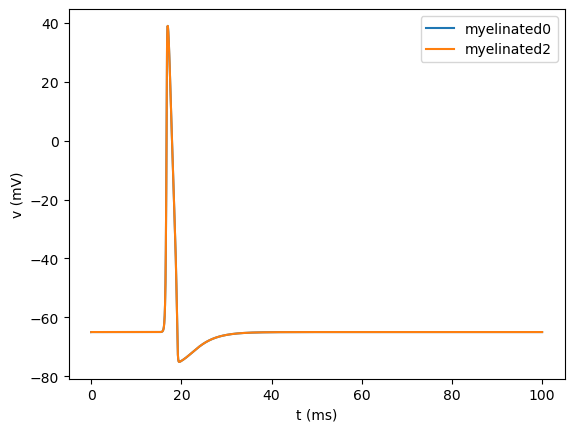

In [103]:
plt.plot(t, myelaxons[0].v, label='myelinated0')
plt.plot(t, myelaxons[2].v, label='myelinated2')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.legend()
plt.show()

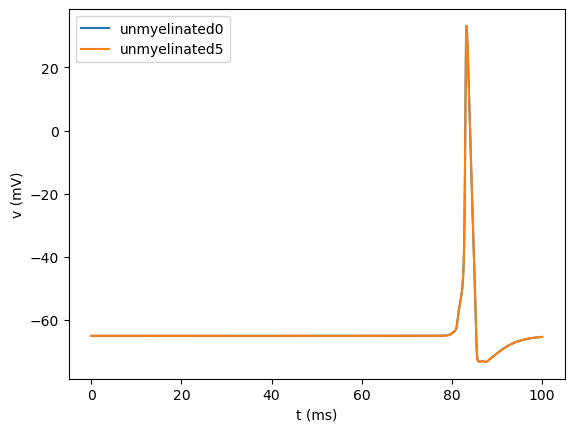

In [104]:
plt.plot(t, unmyelaxons[0].v, label='unmyelinated0')
plt.plot(t, unmyelaxons[5].v, label='unmyelinated5')
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.legend()
plt.show()